# TEST iv sipm

## Updates to make

- [x] enable saving option in .pdf, .jpg, .png formats
- [ ] compute single-cell quenching resistance

In [1]:
from iv_sipm_class_DEF import *

# %matplotlib

## iv_sipm.py

0.020587869066117034 + 0.012615539317973988 x**1
[array([1.92844272e-06]), 2, array([1.00000846, 0.99999154]), 1.7763568394002505e-14]
0.02258569689860316 + 0.008454608099422927 x**1
[array([9.01760975e-08]), 2, array([1.0006851 , 0.99931443]), 1.6653345369377348e-14]


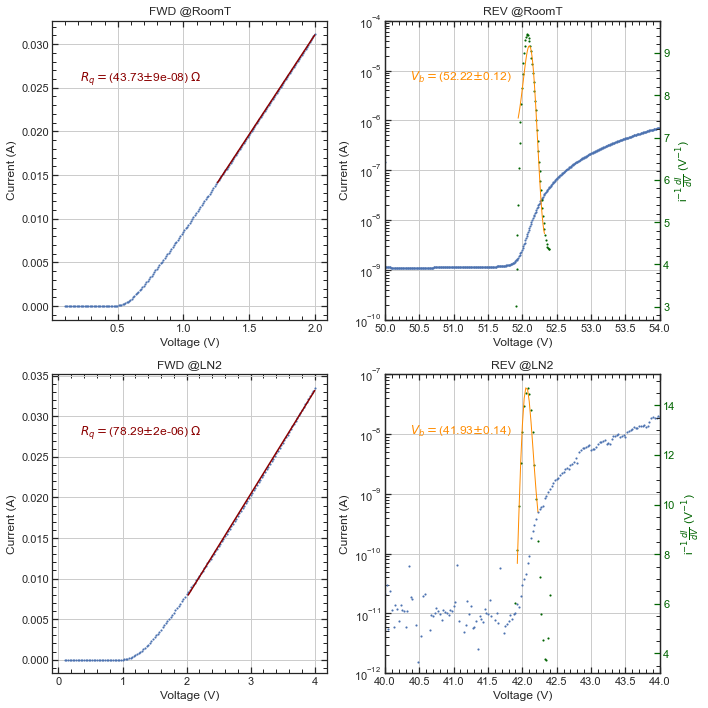

<Figure size 432x288 with 0 Axes>

In [6]:
BASEPATH = "../Data/"

myfiles = {'LN2':   {'FWD': [], 'REV': []},
           'RoomT': {'FWD': [], 'REV': []} }

TEMPERATURES = list(myfiles.keys())
DIRECTIONS = ['FWD','REV']

params = {'LN2':   {'threshold': 2, 
                    'rev_limits': (41.9,42.4),
                    'xlim': (40,44),
                    'ylim': (1e-12,1e-7),
                    'plt_idx': 0},
          'RoomT': {'threshold': 1.25,
                    'rev_limits': (51.9,52.4),
                    'xlim': (50,54),
                    'ylim': (1e-10,1e-4),
                    'plt_idx': 1},
          'revFitDegree': 4
         }

###############################################################################

### Prepare DICT with files to be processed
for root, dirs, files in os.walk(BASEPATH):
    
    if "DCR" in dirs:
        dirs.remove('DCR')
    
    if fnmatch.fnmatch(root, "*LN2"):
        myfiles['LN2'] = {D: [os.path.join(root, file) for file in files if file.find(D) > -1] for D in DIRECTIONS}
        myfiles['LN2']['REV'].sort()

    if fnmatch.fnmatch(root, "*RoomT"):
        myfiles['RoomT'] = {D: [os.path.join(root, file) for file in files if file.find(D) > -1] for D in DIRECTIONS }
        myfiles['RoomT']['REV'].sort()
        
###############################################################################

# Plotting

fig, ax = plt.subplots(2,2, figsize=(10,10))

# LN2
datafiles = myfiles[TEMPERATURES[0]]
sipmf = iv(TEMPERATURES[0],datafiles,params=params)

# RoomT
datafiles = myfiles[TEMPERATURES[1]]
sipmc = iv(TEMPERATURES[1],datafiles,params=params)

# Perform fit
sipmf.fit_iv()
sipmc.fit_iv()

# Plot
sipmc.plot_iv('RoomT',ax[0])
sipmf.plot_iv('LN2',ax[1])
fig.tight_layout()
plt.show()
plt.savefig("FWD-REV_plots.pdf", dpi='figure', format='pdf')

### Support cells

# Original code (below)